<a href="https://colab.research.google.com/github/MarianaCastrillonM004/Integracion-de-prospectiva-y-datos/blob/main/Taller_Fallos_tecnologicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Fallos Tecnológicos - FINTECH**

Se plantea como caso de estudio el analisis de las perdidas generadas en el riesgo derivado de las operaciones del negocio de una Fintech.

Estos son los riegos son los que se presentan en canales electrónico.

* **Frecuencia:** Indica el numero de fallas electronicas que manifiestan los usuarios cada día (tiempo)

* **Severidad:** Indica el costo de solucionar cada evento de riesgo (millones)

* **Distribucion agregada de pérdidas:** producto entre la severidad y la frecuencia

Es importante mencionar que el producto entre la severidad y la frecuencia da como resultado la distribucion agregada de las pérdidas (LDA - Loss Distribution Approach) y es precisamente que se hará la caracterización de esta distribución utilizando las medidas de tendencia central (media y desviaciÓn) y las medidas de dispersión (coeficiente de asimetría y kurtosis).





0. Cargar librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #libreria para trabajo estadistico
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los archivos de trabajo

In [ ]:
nxl='/content/drive/MyDrive/UNIVERSIDAD/Enfasis/Archivos I&P/1. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)



,Fallas Tecnológicas (Canales Electronicos),Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Fechas,Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),LDA
1,2009-01-01 00:00:00,1,0.5374,0.5374
2,2009-01-02 00:00:00,4,1.1978,4.7912
3,2009-01-03 00:00:00,5,0.4269,2.1345
4,2009-01-04 00:00:00,6,1.0814,6.4884
5,2009-01-05 00:00:00,7,1.2105,8.4735
6,2009-01-06 00:00:00,3,0.2363,0.7089
7,2009-01-07 00:00:00,1,0.2737,0.2737
8,2009-01-08 00:00:00,8,12.4245,99.396
9,2009-01-09 00:00:00,1,2.3869,2.3869


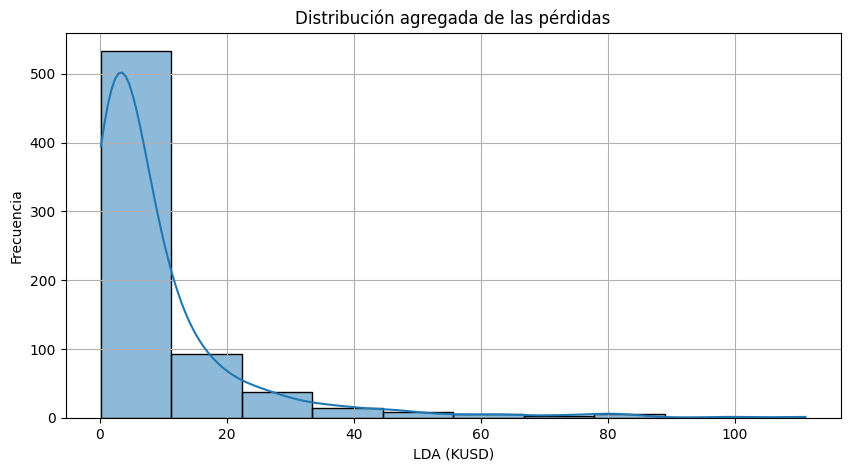

In [ ]:
#Procedemos con la construcción de la distribución agregada de las pérdidas

# Skip the first row (index 0) which contains string headers and convert to numeric.
# Use correct columns for frequency (index 1, 'Unnamed: 1') and severity (index 2, 'Unnamed: 2').
freq=XDB.iloc[1:,1].astype(float)
sev=XDB.iloc[1:,2].astype(float)
LDA=freq*sev

#Se procede con la construccion de la distribucion agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10, kde=True)
plt.title('Distribución agregada de las pérdidas')
plt.xlabel('LDA (KUSD)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

2. Se procede con la clusterización estadistica. Esta esta definida por el histograma de frecuencias.

In [ ]:
np.set_printoptions(suppress=True, precision=2)
NI = 10 #Indica el numero de clusters
counts,bin_edges = np.histogram(LDA,bins=NI)  #Bin edge singnifica que vamos a tomar los lim inferiores y superiores y el numero de datos por cada cluster
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores son:")
print(bin_edges [:-1])
print("Los intervalos superiores son:")
print(bin_edges [1:])
XC=(bin_edges [:-1]+bin_edges [1:])/2
print("El centroide de cada cluster es:")
print(XC)

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores son:
[ 0.14 11.24 22.33 33.42 44.52 55.61 66.71 77.8  88.89 99.99]
Los intervalos superiores son:
[ 11.24  22.33  33.42  44.52  55.61  66.71  77.8   88.89  99.99 111.08]
El centroide de cada cluster es:
[  5.69  16.78  27.88  38.97  50.07  61.16  72.25  83.35  94.44 105.54]


In [ ]:
#Se configura la tabla
Tabla= np.column_stack((bin_edges [:-1],bin_edges [1:],XC, counts))
df=pd.DataFrame(Tabla,columns=['Límite inferior','Límite superior','Centroide','N datos X intervalo'])
print(df)

   Límite inferior  Límite superior   Centroide  N datos X intervalo
0          0.14230         11.23637    5.689335                533.0
1         11.23637         22.33044   16.783405                 93.0
2         22.33044         33.42451   27.877475                 37.0
3         33.42451         44.51858   38.971545                 14.0
4         44.51858         55.61265   50.065615                  9.0
5         55.61265         66.70672   61.159685                  5.0
6         66.70672         77.80079   72.253755                  3.0
7         77.80079         88.89486   83.347825                  5.0
8         88.89486         99.98893   94.441895                  1.0
9         99.98893        111.08300  105.535965                  1.0


3. Se calculan las metricas estadisticas de tendencia central y dispersión: Media, desviación, asimetria y kurtosis

In [ ]:
u=np.mean(LDA)
varianza=np.var(LDA)
sigma=np.std(LDA)

T2=np.column_stack((u,varianza,sigma))
df2=pd.DataFrame(T2,columns=['Media','Varianza','Desviación'])
print(df2)

      Media    Varianza  Desviación
0  9.451113  187.894776   13.707472


In [ ]:
from scipy.stats import skew, kurtosis


# Calculate skewness and kurtosis
skewness_lda = skew(LDA)
kurtosis_lda = kurtosis(LDA)

# Create a DataFrame for skewness and kurtosis
T3 = np.column_stack((u,varianza,sigma, skewness_lda, kurtosis_lda))
df3 = pd.DataFrame(T3, columns=['Media','Varianza','Desviación', 'Asimetría', 'Curtosis'])

print(df3)

      Media    Varianza  Desviación  Asimetría   Curtosis
0  9.451113  187.894776   13.707472    3.34836  14.167714


**Analisis de resultados**

De las metricas de tendencia central y dispersion podemos observar que los datos tienen la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetria (3,34836), el cual esta por encima de la unidad. Lo que indica que en general las pérdidas por fallos electrónicos presentados son pérdidas menores, mejor conocidas como pérdidas esperadas.
Por su parte el coeficiente de kurtosis muestra que los datos se encuentran muy concentrados al lado izquierdo la media de la distribucion de las perdidas tal como se puede observar en la grafica del histograma de frecuencia; esto refuerza la idea de menores pérdidas.